<a href="https://colab.research.google.com/github/norhanmagdi/Compiler/blob/master/DMass3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install -q wordcloud
import wordcloud
import nltk
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def preProcessing(filename):
  file = open(filename, 'rt')
  text = file.read()
  file.close()
  # lower cases
  text=text.lower()
  # split into sentences
 
  ###sentences = sent_tokenize(text)
  #print(sentences[0])

  # split into words

  tokens = word_tokenize(text)
  #print(tokens[:100])

  # remove all tokens that are not alphabetic
  
 # words = [word for word in tokens if word.isalpha()]
 # for word in words:
 #   word = TextBlob(word).correct()
    
  #print(words[:100])

 
  #####stop_words = stopwords.words('english')

  # filter out stop words
  
  stop_words = set(stopwords.words('english'))
  words = [w for w in tokens if not w in stop_words]
  #print(words[:100])

  # stemming of words
  
  porter = PorterStemmer()
  stemmed = [porter.stem(word) for word in words]
  #print(stemmed[:100])
  #print([' '.join(stemmed)])
  return ' '.join(stemmed)

In [ ]:
import os
# assign directory
directory1 = '/content/drive/MyDrive/ca/aclImdb/train/neg/'
directory2 = '/content/drive/MyDrive/ca/aclImdb/train/pos/'
Xtrain=[]
Ytrain=[]
# iterate over files in
# that directory
for filename in os.listdir(directory1):
    f = os.path.join(directory1, filename)
    # checking if it is a file
    if os.path.isfile(f):
      if len(Xtrain)%1000==0:
        print(len(Xtrain))
      #print(f)
      newText=preProcessing(f)
        #print(len(Xtrain))
        #print(newText)
      Xtrain.append(newText)
      name, extension = os.path.splitext(filename)
      Ytrain.append(int(name[-1]))
print(len(Xtrain))
print(len(Ytrain))

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
12500
12500


In [ ]:
for filename in os.listdir(directory2):
    f = os.path.join(directory2, filename)
    # checking if it is a file
    if os.path.isfile(f):
        #print(f)
        if len(Xtrain)%1000==0:
          print(len(Xtrain))
        newText=preProcessing(f)
        #print(len(Xtrain))
        #print(newText)
        Xtrain.append(newText)
        name, extension = os.path.splitext(filename)
        Ytrain.append(int(name.split('_')[1]))
print(len(Xtrain))
print(len(Ytrain))

13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
25000


In [ ]:
import os
# assign directory
directory1 = '/content/drive/MyDrive/ca/aclImdb/test/neg/'
directory2 = '/content/drive/MyDrive/ca/aclImdb/test/pos/'
Xtest=[]
Ytest=[]
# iterate over files in
# that directory
for filename in os.listdir(directory1):
    f = os.path.join(directory1, filename)
    # checking if it is a file
    if os.path.isfile(f):
      if len(Xtest)%1000==0:
        print(len(Xtest))
      text_file = open(f, "r")
      newText=text_file.read()
      Xtest.append(newText)
      name, extension = os.path.splitext(filename)
      Ytest.append(int(name[-1]))
print(len(Xtest))
print(len(Ytest))
for filename in os.listdir(directory2):
    f = os.path.join(directory2, filename)
    # checking if it is a file
    if os.path.isfile(f):
        #print(f)
        if len(Xtest)%1000==0:
          print(len(Xtest))
        text_file = open(f, "r")
        newText=text_file.read()        
        #print(len(Xtrain))
        #print(newText)
        Xtest.append(newText)
        name, extension = os.path.splitext(filename)
        Ytest.append(int(name.split('_')[1]))
print(len(Xtest))
print(len(Ytest))

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
12500
12500
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
25000


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

Xdf=pd.DataFrame(Xtrain)
# print(Xdf)
x_train=Xdf[0]
# print(xtrain)
# print(Xdf[0])
Ydf=pd.DataFrame(Ytrain)
y_train=Ydf[0]
# print(Xdf.shape)
# print(np.array(Xtrain).shape)
# print(xtrain.shape)
# print(np.array(Ytrain).shape)
# print(ytrain.shape)


* **#Adaboost classifier**

In [ ]:
from sklearn.model_selection import train_test_split
trainX, devX, trainY, devY = train_test_split(x_train, y_train, test_size=0.1)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import  AdaBoostClassifier
from sklearn.metrics import classification_report
def solveAdaBoost(x_train, x_test, y_train, y_test, n, learning_rate):
  text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                      ('clf',AdaBoostClassifier(n_estimators=n, learning_rate=learning_rate))])
  text_clf.fit(x_train, y_train)  
  predictions = text_clf.predict(x_test)
  print("###############################################################")
  print("for n estimators : ",n," and learning rate : ",learning_rate)
  print("accuraccy is :")
  print(metrics.accuracy_score(y_test,predictions))
  print(metrics.classification_report(y_test,predictions)) 
  return metrics.accuracy_score(y_test,predictions)


In [ ]:
solveAdaBoost(x_train, Xtest, y_train, Ytest, 50, 1.0)

###############################################################
for n estimators :  50  and learning rate :  1.0
accuraccy is :
0.28404
              precision    recall  f1-score   support

           1       0.50      0.44      0.47      5022
           2       0.09      0.00      0.00      2302
           3       0.33      0.00      0.00      2541
           4       0.20      0.06      0.10      2635
           7       0.16      0.08      0.11      2307
           8       0.18      0.17      0.18      2850
           9       0.18      0.00      0.01      2344
          10       0.25      0.81      0.39      4999

    accuracy                           0.28     25000
   macro avg       0.24      0.20      0.16     25000
weighted avg       0.27      0.28      0.21     25000



0.28404

###############################################################
for n estimators :  10  and learning rate :  1.0
accuraccy is :
0.318
              precision    recall  f1-score   support

           1       0.42      0.70      0.52       506
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00       222
           4       0.00      0.00      0.00       270
           7       0.00      0.00      0.00       262
           8       0.00      0.00      0.00       282
           9       0.00      0.00      0.00       240
          10       0.27      0.89      0.41       495

    accuracy                           0.32      2500
   macro avg       0.09      0.20      0.12      2500
weighted avg       0.14      0.32      0.19      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###############################################################
for n estimators :  50  and learning rate :  1.0
accuraccy is :
0.3556
              precision    recall  f1-score   support

           1       0.44      0.76      0.56       506
           2       0.12      0.03      0.04       223
           3       0.18      0.02      0.03       222
           4       0.23      0.19      0.21       270
           7       0.26      0.16      0.20       262
           8       0.23      0.15      0.18       282
           9       0.13      0.01      0.02       240
          10       0.37      0.73      0.49       495

    accuracy                           0.36      2500
   macro avg       0.24      0.25      0.22      2500
weighted avg       0.28      0.36      0.28      2500

###############################################################
for n estimators :  100  and learning rate :  1.0
accuraccy is :
0.3592
              precision    recall  f1-score   support

           1       0.46

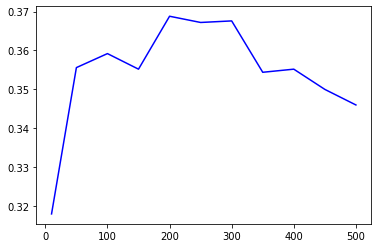

In [ ]:
from matplotlib import pyplot as plt
n=[10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
accs=[]
for i in n:
  newAcc=solveAdaBoost(trainX, devX, trainY, devY, i, 1.0)
  accs.append(newAcc)
plt.plot(n,accs,'b')
accMax = max(accs)
kpos = accs.index(accMax)
kMax = n[kpos]
print("max accuraccy is ", accMax)
print("where n estimators are ", kMax)



###############################################################
for n estimators :  50  and learning rate :  0.2
accuraccy is :
0.3368
              precision    recall  f1-score   support

           1       0.42      0.76      0.54       506
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00       222
           4       0.31      0.04      0.08       270
           7       1.00      0.00      0.01       262
           8       0.00      0.00      0.00       282
           9       0.00      0.00      0.00       240
          10       0.29      0.90      0.44       495

    accuracy                           0.34      2500
   macro avg       0.25      0.21      0.13      2500
weighted avg       0.28      0.34      0.20      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###############################################################
for n estimators :  50  and learning rate :  0.4
accuraccy is :
0.3504
              precision    recall  f1-score   support

           1       0.45      0.76      0.56       506
           2       1.00      0.00      0.01       223
           3       0.00      0.00      0.00       222
           4       0.19      0.13      0.16       270
           7       0.25      0.06      0.09       262
           8       0.23      0.06      0.10       282
           9       0.00      0.00      0.00       240
          10       0.32      0.85      0.47       495

    accuracy                           0.35      2500
   macro avg       0.30      0.23      0.17      2500
weighted avg       0.32      0.35      0.25      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###############################################################
for n estimators :  50  and learning rate :  0.6
accuraccy is :
0.364
              precision    recall  f1-score   support

           1       0.44      0.78      0.56       506
           2       0.38      0.01      0.03       223
           3       0.21      0.01      0.03       222
           4       0.22      0.19      0.20       270
           7       0.33      0.13      0.19       262
           8       0.25      0.12      0.16       282
           9       0.00      0.00      0.00       240
          10       0.35      0.79      0.49       495

    accuracy                           0.36      2500
   macro avg       0.27      0.25      0.21      2500
weighted avg       0.30      0.36      0.27      2500

###############################################################
for n estimators :  50  and learning rate :  0.8
accuraccy is :
0.3556
              precision    recall  f1-score   support

           1       0.44  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###############################################################
for n estimators :  50  and learning rate :  2.5
accuraccy is :
0.11
              precision    recall  f1-score   support

           1       0.51      0.04      0.08       506
           2       0.06      0.02      0.03       223
           3       0.18      0.03      0.05       222
           4       0.11      0.54      0.18       270
           7       0.00      0.00      0.00       262
           8       0.10      0.33      0.16       282
           9       0.05      0.01      0.02       240
          10       0.00      0.00      0.00       495

    accuracy                           0.11      2500
   macro avg       0.13      0.12      0.06      2500
weighted avg       0.15      0.11      0.06      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###############################################################
for n estimators :  50  and learning rate :  3
accuraccy is :
0.1172
              precision    recall  f1-score   support

           1       0.19      0.16      0.17       506
           2       0.35      0.03      0.06       223
           3       0.12      0.01      0.02       222
           4       0.15      0.03      0.04       270
           7       0.10      0.72      0.18       262
           8       0.06      0.02      0.03       282
           9       0.05      0.00      0.01       240
          10       0.00      0.00      0.00       495

    accuracy                           0.12      2500
   macro avg       0.13      0.12      0.06      2500
weighted avg       0.12      0.12      0.07      2500

max accuraccy is  0.364
where learning rate is  0.6


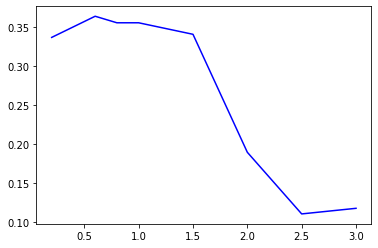

In [ ]:
from matplotlib import pyplot as plt
learningRate=[0.2, 0.4, 0.6, 0.8, 1, 1.5, 2, 2.5,3]
accs=[]
for i in learningRate:
  newAcc=solveAdaBoost(trainX, devX, trainY, devY, 50, i)
  accs.append(newAcc)
plt.plot(learningRate,accs,'b')
accMax = max(accs)
kpos = accs.index(accMax)
kMax = learningRate[kpos]
print("max accuraccy is ", accMax)
print("where learning rate is ", kMax)

In [ ]:
from matplotlib import pyplot as plt
n=[150,170,190,210,230,250,270,290,310,330,350]
learningRate=[0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6]
accs=[]
vals=[]
for i in n:
  for j in learningRate:
    newAcc=solveAdaBoost(trainX, devX, trainY, devY, i,j)
    vals.append(str(i)+" , "+str(j))
    accs.append(newAcc)
accMax = max(accs)
kpos = accs.index(accMax)
kMax = vals[kpos]

print("max accuraccy is ", accMax)
print("where n estimators and learning rate are ", kMax)

###############################################################
for n estimators :  150  and learning rate :  0.2
accuraccy is :
0.3636
              precision    recall  f1-score   support

           1       0.45      0.77      0.57       506
           2       0.33      0.00      0.01       223
           3       0.20      0.00      0.01       222
           4       0.23      0.19      0.21       270
           7       0.29      0.05      0.09       262
           8       0.26      0.13      0.18       282
           9       0.00      0.00      0.00       240
          10       0.34      0.84      0.49       495

    accuracy                           0.36      2500
   macro avg       0.26      0.25      0.19      2500
weighted avg       0.29      0.36      0.26      2500

###############################################################
for n estimators :  150  and learning rate :  0.4
accuraccy is :
0.386
              precision    recall  f1-score   support

           1       0.49

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###############################################################
for n estimators :  170  and learning rate :  0.4
accuraccy is :
0.3868
              precision    recall  f1-score   support

           1       0.49      0.77      0.60       506
           2       0.14      0.01      0.02       223
           3       0.22      0.05      0.08       222
           4       0.26      0.28      0.27       270
           7       0.30      0.15      0.20       262
           8       0.30      0.24      0.27       282
           9       0.20      0.00      0.01       240
          10       0.39      0.77      0.52       495

    accuracy                           0.39      2500
   macro avg       0.29      0.28      0.25      2500
weighted avg       0.32      0.39      0.31      2500

###############################################################
for n estimators :  170  and learning rate :  0.6
accuraccy is :
0.38
              precision    recall  f1-score   support

           1       0.49 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###############################################################
for n estimators :  190  and learning rate :  0.4
accuraccy is :
0.3868
              precision    recall  f1-score   support

           1       0.49      0.77      0.60       506
           2       0.13      0.01      0.02       223
           3       0.20      0.05      0.09       222
           4       0.25      0.28      0.27       270
           7       0.30      0.16      0.21       262
           8       0.29      0.23      0.25       282
           9       0.17      0.00      0.01       240
          10       0.40      0.77      0.52       495

    accuracy                           0.39      2500
   macro avg       0.28      0.28      0.25      2500
weighted avg       0.32      0.39      0.31      2500

###############################################################
for n estimators :  190  and learning rate :  0.6
accuraccy is :
0.3812
              precision    recall  f1-score   support

           1       0.5

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###############################################################
for n estimators :  210  and learning rate :  0.4
accuraccy is :
0.3856
              precision    recall  f1-score   support

           1       0.50      0.76      0.60       506
           2       0.22      0.03      0.05       223
           3       0.17      0.05      0.07       222
           4       0.25      0.28      0.26       270
           7       0.29      0.15      0.20       262
           8       0.28      0.23      0.25       282
           9       0.12      0.00      0.01       240
          10       0.40      0.77      0.52       495

    accuracy                           0.39      2500
   macro avg       0.28      0.28      0.25      2500
weighted avg       0.31      0.39      0.31      2500

###############################################################
for n estimators :  210  and learning rate :  0.6
accuraccy is :
0.3812
              precision    recall  f1-score   support

           1       0.5

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###############################################################
for n estimators :  230  and learning rate :  0.4
accuraccy is :
0.3876
              precision    recall  f1-score   support

           1       0.51      0.76      0.61       506
           2       0.23      0.03      0.06       223
           3       0.16      0.05      0.08       222
           4       0.25      0.27      0.26       270
           7       0.30      0.17      0.22       262
           8       0.30      0.26      0.28       282
           9       0.12      0.00      0.01       240
          10       0.39      0.76      0.52       495

    accuracy                           0.39      2500
   macro avg       0.28      0.29      0.25      2500
weighted avg       0.32      0.39      0.32      2500

###############################################################
for n estimators :  230  and learning rate :  0.6
accuraccy is :
0.3768
              precision    recall  f1-score   support

           1       0.5

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###############################################################
for n estimators :  250  and learning rate :  0.4
accuraccy is :
0.3876
              precision    recall  f1-score   support

           1       0.51      0.75      0.61       506
           2       0.22      0.04      0.07       223
           3       0.20      0.07      0.10       222
           4       0.25      0.27      0.26       270
           7       0.29      0.17      0.22       262
           8       0.28      0.25      0.27       282
           9       0.09      0.00      0.01       240
          10       0.40      0.75      0.52       495

    accuracy                           0.39      2500
   macro avg       0.28      0.29      0.26      2500
weighted avg       0.32      0.39      0.32      2500

###############################################################
for n estimators :  250  and learning rate :  0.6
accuraccy is :
0.372
              precision    recall  f1-score   support

           1       0.51

In [ ]:

for i in range(0,len(vals)):
  print("for n estimators and learning rate ",vals[i]," accuracy is ",accs[i])

for n estimators and learning rate  150 , 0.2  accuracy is  0.3636
for n estimators and learning rate  150 , 0.4  accuracy is  0.386
for n estimators and learning rate  150 , 0.6  accuracy is  0.3796
for n estimators and learning rate  150 , 0.8  accuracy is  0.376
for n estimators and learning rate  150 , 1  accuracy is  0.3552
for n estimators and learning rate  150 , 1.2  accuracy is  0.3536
for n estimators and learning rate  150 , 1.4  accuracy is  0.3412
for n estimators and learning rate  150 , 1.6  accuracy is  0.3352
for n estimators and learning rate  170 , 0.2  accuracy is  0.3712
for n estimators and learning rate  170 , 0.4  accuracy is  0.3868
for n estimators and learning rate  170 , 0.6  accuracy is  0.38
for n estimators and learning rate  170 , 0.8  accuracy is  0.38
for n estimators and learning rate  170 , 1  accuracy is  0.3612
for n estimators and learning rate  170 , 1.2  accuracy is  0.352
for n estimators and learning rate  170 , 1.4  accuracy is  0.3372
for n 

In [ ]:
solveAdaBoost(x_train, Xtest, y_train, Ytest, 310, 0.4)

###############################################################
for n estimators :  310  and learning rate :  0.4
accuraccy is :
0.30572
              precision    recall  f1-score   support

           1       0.54      0.46      0.49      5022
           2       0.12      0.00      0.00      2302
           3       0.18      0.01      0.01      2541
           4       0.20      0.18      0.19      2635
           7       0.19      0.13      0.15      2307
           8       0.20      0.16      0.17      2850
           9       0.09      0.01      0.02      2344
          10       0.29      0.82      0.43      4999

    accuracy                           0.31     25000
   macro avg       0.23      0.22      0.18     25000
weighted avg       0.26      0.31      0.24     25000



0.30572

#**#KNN classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
def solveKNN(x_train, x_test, y_train, y_test, k):
  text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                      ('clf',KNeighborsClassifier(n_neighbors=k))])
  text_clf.fit(x_train, y_train)  
  predictions = text_clf.predict(x_test)
  print("############################################")
  print("for k = ",k)
  print("accuraccy is :")
  print(metrics.accuracy_score(y_test,predictions))
  print(metrics.classification_report(y_test,predictions)) 
  return metrics.accuracy_score(y_test,predictions)


In [ ]:
solveKNN(x_train, Xtest, y_train, Ytest, 5)

for k =  5
accuraccy is :
0.1878
              precision    recall  f1-score   support

           1       0.22      0.66      0.33      5022
           2       0.10      0.09      0.09      2302
           3       0.07      0.02      0.03      2541
           4       0.11      0.02      0.03      2635
           7       0.10      0.07      0.08      2307
           8       0.13      0.10      0.12      2850
           9       0.10      0.04      0.06      2344
          10       0.25      0.11      0.15      4999

    accuracy                           0.19     25000
   macro avg       0.14      0.14      0.11     25000
weighted avg       0.16      0.19      0.14     25000



0.1878

############################################
for k =  1
accuraccy is :
0.2656
              precision    recall  f1-score   support

           1       0.43      0.36      0.39       506
           2       0.13      0.10      0.12       223
           3       0.15      0.14      0.14       222
           4       0.20      0.26      0.23       270
           7       0.23      0.24      0.24       262
           8       0.21      0.25      0.23       282
           9       0.17      0.15      0.16       240
          10       0.36      0.38      0.37       495

    accuracy                           0.27      2500
   macro avg       0.24      0.24      0.23      2500
weighted avg       0.27      0.27      0.27      2500

############################################
for k =  1001
accuraccy is :
0.3052
              precision    recall  f1-score   support

           1       0.26      0.98      0.42       506
           2       0.00      0.00      0.00       223
           3       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  2001
accuraccy is :
0.2936
              precision    recall  f1-score   support

           1       0.25      0.99      0.40       506
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00       222
           4       0.00      0.00      0.00       270
           7       0.00      0.00      0.00       262
           8       0.67      0.01      0.01       282
           9       0.00      0.00      0.00       240
          10       0.45      0.46      0.46       495

    accuracy                           0.29      2500
   macro avg       0.17      0.18      0.11      2500
weighted avg       0.21      0.29      0.17      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  3001
accuraccy is :
0.286
              precision    recall  f1-score   support

           1       0.25      0.99      0.39       506
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00       222
           4       0.00      0.00      0.00       270
           7       0.00      0.00      0.00       262
           8       0.00      0.00      0.00       282
           9       0.00      0.00      0.00       240
          10       0.47      0.43      0.45       495

    accuracy                           0.29      2500
   macro avg       0.09      0.18      0.11      2500
weighted avg       0.14      0.29      0.17      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  4001
accuraccy is :
0.2768
              precision    recall  f1-score   support

           1       0.24      1.00      0.39       506
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00       222
           4       0.00      0.00      0.00       270
           7       0.00      0.00      0.00       262
           8       0.00      0.00      0.00       282
           9       0.00      0.00      0.00       240
          10       0.47      0.38      0.42       495

    accuracy                           0.28      2500
   macro avg       0.09      0.17      0.10      2500
weighted avg       0.14      0.28      0.16      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  5001
accuraccy is :
0.2704
              precision    recall  f1-score   support

           1       0.24      1.00      0.38       506
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00       222
           4       0.00      0.00      0.00       270
           7       0.00      0.00      0.00       262
           8       0.00      0.00      0.00       282
           9       0.00      0.00      0.00       240
          10       0.47      0.35      0.40       495

    accuracy                           0.27      2500
   macro avg       0.09      0.17      0.10      2500
weighted avg       0.14      0.27      0.16      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  6001
accuraccy is :
0.2648
              precision    recall  f1-score   support

           1       0.23      1.00      0.38       506
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00       222
           4       0.00      0.00      0.00       270
           7       0.00      0.00      0.00       262
           8       0.00      0.00      0.00       282
           9       0.00      0.00      0.00       240
          10       0.47      0.32      0.38       495

    accuracy                           0.26      2500
   macro avg       0.09      0.16      0.09      2500
weighted avg       0.14      0.26      0.15      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  7001
accuraccy is :
0.2596
              precision    recall  f1-score   support

           1       0.23      1.00      0.37       506
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00       222
           4       0.00      0.00      0.00       270
           7       0.00      0.00      0.00       262
           8       0.00      0.00      0.00       282
           9       0.00      0.00      0.00       240
          10       0.48      0.29      0.36       495

    accuracy                           0.26      2500
   macro avg       0.09      0.16      0.09      2500
weighted avg       0.14      0.26      0.15      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  8001
accuraccy is :
0.2524
              precision    recall  f1-score   support

           1       0.23      1.00      0.37       506
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00       222
           4       0.00      0.00      0.00       270
           7       0.00      0.00      0.00       262
           8       0.00      0.00      0.00       282
           9       0.00      0.00      0.00       240
          10       0.48      0.25      0.33       495

    accuracy                           0.25      2500
   macro avg       0.09      0.16      0.09      2500
weighted avg       0.14      0.25      0.14      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  9001
accuraccy is :
0.248
              precision    recall  f1-score   support

           1       0.22      1.00      0.37       506
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00       222
           4       0.00      0.00      0.00       270
           7       0.00      0.00      0.00       262
           8       0.00      0.00      0.00       282
           9       0.00      0.00      0.00       240
          10       0.47      0.23      0.31       495

    accuracy                           0.25      2500
   macro avg       0.09      0.15      0.08      2500
weighted avg       0.14      0.25      0.14      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  10001
accuraccy is :
0.244
              precision    recall  f1-score   support

           1       0.22      1.00      0.36       506
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00       222
           4       0.00      0.00      0.00       270
           7       0.00      0.00      0.00       262
           8       0.00      0.00      0.00       282
           9       0.00      0.00      0.00       240
          10       0.47      0.21      0.29       495

    accuracy                           0.24      2500
   macro avg       0.09      0.15      0.08      2500
weighted avg       0.14      0.24      0.13      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  11001
accuraccy is :
0.24
              precision    recall  f1-score   support

           1       0.22      1.00      0.36       506
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00       222
           4       0.00      0.00      0.00       270
           7       0.00      0.00      0.00       262
           8       0.00      0.00      0.00       282
           9       0.00      0.00      0.00       240
          10       0.47      0.19      0.27       495

    accuracy                           0.24      2500
   macro avg       0.09      0.15      0.08      2500
weighted avg       0.14      0.24      0.13      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  12001
accuraccy is :
0.2344
              precision    recall  f1-score   support

           1       0.22      1.00      0.36       506
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00       222
           4       0.00      0.00      0.00       270
           7       0.00      0.00      0.00       262
           8       0.00      0.00      0.00       282
           9       0.00      0.00      0.00       240
          10       0.46      0.16      0.24       495

    accuracy                           0.23      2500
   macro avg       0.08      0.15      0.07      2500
weighted avg       0.13      0.23      0.12      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  13001
accuraccy is :
0.23
              precision    recall  f1-score   support

           1       0.22      1.00      0.35       506
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00       222
           4       0.00      0.00      0.00       270
           7       0.00      0.00      0.00       262
           8       0.00      0.00      0.00       282
           9       0.00      0.00      0.00       240
          10       0.45      0.14      0.21       495

    accuracy                           0.23      2500
   macro avg       0.08      0.14      0.07      2500
weighted avg       0.13      0.23      0.11      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  14001
accuraccy is :
0.2252
              precision    recall  f1-score   support

           1       0.21      1.00      0.35       506
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00       222
           4       0.00      0.00      0.00       270
           7       0.00      0.00      0.00       262
           8       0.00      0.00      0.00       282
           9       0.00      0.00      0.00       240
          10       0.45      0.12      0.18       495

    accuracy                           0.23      2500
   macro avg       0.08      0.14      0.07      2500
weighted avg       0.13      0.23      0.11      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  15001
accuraccy is :
0.2224
              precision    recall  f1-score   support

           1       0.21      1.00      0.35       506
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00       222
           4       0.00      0.00      0.00       270
           7       0.00      0.00      0.00       262
           8       0.00      0.00      0.00       282
           9       0.00      0.00      0.00       240
          10       0.45      0.10      0.17       495

    accuracy                           0.22      2500
   macro avg       0.08      0.14      0.06      2500
weighted avg       0.13      0.22      0.10      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  16001
accuraccy is :
0.2164
              precision    recall  f1-score   support

           1       0.21      1.00      0.35       506
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00       222
           4       0.00      0.00      0.00       270
           7       0.00      0.00      0.00       262
           8       0.00      0.00      0.00       282
           9       0.00      0.00      0.00       240
          10       0.43      0.07      0.12       495

    accuracy                           0.22      2500
   macro avg       0.08      0.13      0.06      2500
weighted avg       0.13      0.22      0.09      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  17001
accuraccy is :
0.2116
              precision    recall  f1-score   support

           1       0.21      1.00      0.34       506
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00       222
           4       0.00      0.00      0.00       270
           7       0.00      0.00      0.00       262
           8       0.00      0.00      0.00       282
           9       0.00      0.00      0.00       240
          10       0.37      0.05      0.08       495

    accuracy                           0.21      2500
   macro avg       0.07      0.13      0.05      2500
weighted avg       0.11      0.21      0.09      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  18001
accuraccy is :
0.2072
              precision    recall  f1-score   support

           1       0.21      1.00      0.34       506
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00       222
           4       0.00      0.00      0.00       270
           7       0.00      0.00      0.00       262
           8       0.00      0.00      0.00       282
           9       0.00      0.00      0.00       240
          10       0.32      0.02      0.05       495

    accuracy                           0.21      2500
   macro avg       0.07      0.13      0.05      2500
weighted avg       0.11      0.21      0.08      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  19001
accuraccy is :
0.2064
              precision    recall  f1-score   support

           1       0.20      1.00      0.34       506
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00       222
           4       0.00      0.00      0.00       270
           7       0.00      0.00      0.00       262
           8       0.00      0.00      0.00       282
           9       0.00      0.00      0.00       240
          10       0.43      0.02      0.04       495

    accuracy                           0.21      2500
   macro avg       0.08      0.13      0.05      2500
weighted avg       0.13      0.21      0.08      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  20001
accuraccy is :
0.2036
              precision    recall  f1-score   support

           1       0.20      1.00      0.34       506
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00       222
           4       0.00      0.00      0.00       270
           7       0.00      0.00      0.00       262
           8       0.00      0.00      0.00       282
           9       0.00      0.00      0.00       240
          10       0.60      0.01      0.01       495

    accuracy                           0.20      2500
   macro avg       0.10      0.13      0.04      2500
weighted avg       0.16      0.20      0.07      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  21001
accuraccy is :
0.2024
              precision    recall  f1-score   support

           1       0.20      1.00      0.34       506
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00       222
           4       0.00      0.00      0.00       270
           7       0.00      0.00      0.00       262
           8       0.00      0.00      0.00       282
           9       0.00      0.00      0.00       240
          10       0.00      0.00      0.00       495

    accuracy                           0.20      2500
   macro avg       0.03      0.12      0.04      2500
weighted avg       0.04      0.20      0.07      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  22001
accuraccy is :
0.2024
              precision    recall  f1-score   support

           1       0.20      1.00      0.34       506
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00       222
           4       0.00      0.00      0.00       270
           7       0.00      0.00      0.00       262
           8       0.00      0.00      0.00       282
           9       0.00      0.00      0.00       240
          10       0.00      0.00      0.00       495

    accuracy                           0.20      2500
   macro avg       0.03      0.12      0.04      2500
weighted avg       0.04      0.20      0.07      2500

max accuraccy is  0.3052
where k is  1001


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


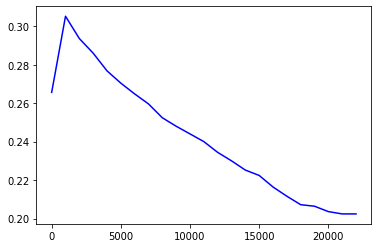

In [ ]:
from matplotlib import pyplot as plt
k=[]
accs=[]
for i in range(1,23000,1000):
  newAcc=solveKNN(trainX, devX, trainY, devY, i)
  k.append(i)
  accs.append(newAcc)
plt.plot(k,accs,'b')
accMax = max(accs)
kpos = accs.index(accMax)
kMax = k[kpos]
print("max accuraccy is ", accMax)
print("where k is ", kMax)



############################################
for k =  1
accuraccy is :
0.2656
              precision    recall  f1-score   support

           1       0.43      0.36      0.39       506
           2       0.13      0.10      0.12       223
           3       0.15      0.14      0.14       222
           4       0.20      0.26      0.23       270
           7       0.23      0.24      0.24       262
           8       0.21      0.25      0.23       282
           9       0.17      0.15      0.16       240
          10       0.36      0.38      0.37       495

    accuracy                           0.27      2500
   macro avg       0.24      0.24      0.23      2500
weighted avg       0.27      0.27      0.27      2500

############################################
for k =  51
accuraccy is :
0.3464
              precision    recall  f1-score   support

           1       0.36      0.89      0.51       506
           2       0.19      0.01      0.03       223
           3       0.10      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  151
accuraccy is :
0.3376
              precision    recall  f1-score   support

           1       0.31      0.94      0.46       506
           2       0.00      0.00      0.00       223
           3       0.80      0.02      0.04       222
           4       0.37      0.04      0.07       270
           7       0.18      0.01      0.02       262
           8       0.29      0.08      0.12       282
           9       0.00      0.00      0.00       240
          10       0.40      0.66      0.50       495

    accuracy                           0.34      2500
   macro avg       0.29      0.22      0.15      2500
weighted avg       0.30      0.34      0.22      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  201
accuraccy is :
0.3304
              precision    recall  f1-score   support

           1       0.30      0.95      0.46       506
           2       0.00      0.00      0.00       223
           3       0.33      0.01      0.02       222
           4       0.29      0.01      0.03       270
           7       0.31      0.02      0.03       262
           8       0.32      0.05      0.09       282
           9       0.00      0.00      0.00       240
          10       0.39      0.65      0.49       495

    accuracy                           0.33      2500
   macro avg       0.24      0.21      0.14      2500
weighted avg       0.27      0.33      0.21      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  251
accuraccy is :
0.33
              precision    recall  f1-score   support

           1       0.29      0.95      0.45       506
           2       0.00      0.00      0.00       223
           3       0.33      0.00      0.01       222
           4       0.33      0.02      0.04       270
           7       0.20      0.01      0.01       262
           8       0.39      0.04      0.08       282
           9       0.00      0.00      0.00       240
          10       0.41      0.65      0.50       495

    accuracy                           0.33      2500
   macro avg       0.24      0.21      0.14      2500
weighted avg       0.27      0.33      0.21      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  301
accuraccy is :
0.3268
              precision    recall  f1-score   support

           1       0.29      0.96      0.44       506
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00       222
           4       0.22      0.01      0.01       270
           7       0.38      0.01      0.02       262
           8       0.42      0.04      0.07       282
           9       0.00      0.00      0.00       240
          10       0.41      0.64      0.50       495

    accuracy                           0.33      2500
   macro avg       0.21      0.21      0.13      2500
weighted avg       0.25      0.33      0.20      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  351
accuraccy is :
0.3248
              precision    recall  f1-score   support

           1       0.28      0.96      0.44       506
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00       222
           4       0.00      0.00      0.00       270
           7       0.67      0.01      0.02       262
           8       0.53      0.03      0.05       282
           9       0.00      0.00      0.00       240
          10       0.41      0.64      0.50       495

    accuracy                           0.32      2500
   macro avg       0.24      0.20      0.13      2500
weighted avg       0.27      0.32      0.20      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  401
accuraccy is :
0.322
              precision    recall  f1-score   support

           1       0.28      0.96      0.43       506
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00       222
           4       0.00      0.00      0.00       270
           7       0.33      0.00      0.01       262
           8       0.43      0.02      0.04       282
           9       0.00      0.00      0.00       240
          10       0.42      0.63      0.50       495

    accuracy                           0.32      2500
   macro avg       0.18      0.20      0.12      2500
weighted avg       0.22      0.32      0.19      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  451
accuraccy is :
0.3216
              precision    recall  f1-score   support

           1       0.28      0.97      0.43       506
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00       222
           4       0.14      0.00      0.01       270
           7       0.25      0.00      0.01       262
           8       0.36      0.01      0.03       282
           9       0.00      0.00      0.00       240
          10       0.42      0.62      0.50       495

    accuracy                           0.32      2500
   macro avg       0.18      0.20      0.12      2500
weighted avg       0.22      0.32      0.19      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  501
accuraccy is :
0.3184
              precision    recall  f1-score   support

           1       0.28      0.97      0.43       506
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00       222
           4       0.00      0.00      0.00       270
           7       0.33      0.00      0.01       262
           8       0.50      0.02      0.03       282
           9       0.00      0.00      0.00       240
          10       0.42      0.60      0.50       495

    accuracy                           0.32      2500
   macro avg       0.19      0.20      0.12      2500
weighted avg       0.23      0.32      0.19      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  551
accuraccy is :
0.314
              precision    recall  f1-score   support

           1       0.27      0.97      0.43       506
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00       222
           4       0.00      0.00      0.00       270
           7       0.50      0.00      0.01       262
           8       0.57      0.01      0.03       282
           9       0.00      0.00      0.00       240
          10       0.42      0.58      0.49       495

    accuracy                           0.31      2500
   macro avg       0.22      0.20      0.12      2500
weighted avg       0.26      0.31      0.19      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  601
accuraccy is :
0.3108
              precision    recall  f1-score   support

           1       0.27      0.97      0.42       506
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00       222
           4       0.00      0.00      0.00       270
           7       0.50      0.00      0.01       262
           8       0.44      0.01      0.03       282
           9       0.00      0.00      0.00       240
          10       0.42      0.56      0.48       495

    accuracy                           0.31      2500
   macro avg       0.20      0.19      0.12      2500
weighted avg       0.24      0.31      0.19      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  651
accuraccy is :
0.31
              precision    recall  f1-score   support

           1       0.27      0.97      0.42       506
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00       222
           4       0.00      0.00      0.00       270
           7       0.00      0.00      0.00       262
           8       0.40      0.01      0.03       282
           9       0.00      0.00      0.00       240
          10       0.42      0.56      0.48       495

    accuracy                           0.31      2500
   macro avg       0.14      0.19      0.12      2500
weighted avg       0.18      0.31      0.18      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  701
accuraccy is :
0.3084
              precision    recall  f1-score   support

           1       0.27      0.97      0.42       506
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00       222
           4       0.00      0.00      0.00       270
           7       0.00      0.00      0.00       262
           8       0.44      0.01      0.03       282
           9       0.00      0.00      0.00       240
          10       0.42      0.55      0.48       495

    accuracy                           0.31      2500
   macro avg       0.14      0.19      0.12      2500
weighted avg       0.19      0.31      0.18      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  751
accuraccy is :
0.308
              precision    recall  f1-score   support

           1       0.27      0.97      0.42       506
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00       222
           4       0.00      0.00      0.00       270
           7       0.00      0.00      0.00       262
           8       0.62      0.02      0.03       282
           9       0.00      0.00      0.00       240
          10       0.42      0.55      0.48       495

    accuracy                           0.31      2500
   macro avg       0.16      0.19      0.12      2500
weighted avg       0.21      0.31      0.18      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  801
accuraccy is :
0.3076
              precision    recall  f1-score   support

           1       0.27      0.98      0.42       506
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00       222
           4       0.00      0.00      0.00       270
           7       0.00      0.00      0.00       262
           8       0.57      0.01      0.03       282
           9       0.00      0.00      0.00       240
          10       0.43      0.55      0.48       495

    accuracy                           0.31      2500
   macro avg       0.16      0.19      0.12      2500
weighted avg       0.20      0.31      0.18      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  851
accuraccy is :
0.3068
              precision    recall  f1-score   support

           1       0.26      0.98      0.42       506
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00       222
           4       0.67      0.01      0.01       270
           7       0.00      0.00      0.00       262
           8       0.71      0.02      0.03       282
           9       0.00      0.00      0.00       240
          10       0.43      0.54      0.48       495

    accuracy                           0.31      2500
   macro avg       0.26      0.19      0.12      2500
weighted avg       0.29      0.31      0.18      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  901
accuraccy is :
0.3064
              precision    recall  f1-score   support

           1       0.26      0.98      0.42       506
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00       222
           4       1.00      0.01      0.01       270
           7       0.00      0.00      0.00       262
           8       0.50      0.01      0.02       282
           9       0.00      0.00      0.00       240
          10       0.43      0.54      0.48       495

    accuracy                           0.31      2500
   macro avg       0.27      0.19      0.12      2500
weighted avg       0.30      0.31      0.18      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  951
accuraccy is :
0.3052
              precision    recall  f1-score   support

           1       0.26      0.98      0.42       506
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00       222
           4       1.00      0.00      0.01       270
           7       0.00      0.00      0.00       262
           8       0.57      0.01      0.03       282
           9       0.00      0.00      0.00       240
          10       0.43      0.53      0.47       495

    accuracy                           0.31      2500
   macro avg       0.28      0.19      0.12      2500
weighted avg       0.31      0.31      0.18      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  1001
accuraccy is :
0.3052
              precision    recall  f1-score   support

           1       0.26      0.98      0.42       506
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00       222
           4       1.00      0.01      0.01       270
           7       0.00      0.00      0.00       262
           8       0.57      0.01      0.03       282
           9       0.00      0.00      0.00       240
          10       0.43      0.53      0.47       495

    accuracy                           0.31      2500
   macro avg       0.28      0.19      0.12      2500
weighted avg       0.31      0.31      0.18      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  1051
accuraccy is :
0.304
              precision    recall  f1-score   support

           1       0.26      0.98      0.42       506
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00       222
           4       1.00      0.00      0.01       270
           7       0.00      0.00      0.00       262
           8       0.57      0.01      0.03       282
           9       0.00      0.00      0.00       240
          10       0.43      0.52      0.47       495

    accuracy                           0.30      2500
   macro avg       0.28      0.19      0.11      2500
weighted avg       0.31      0.30      0.18      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  1101
accuraccy is :
0.3012
              precision    recall  f1-score   support

           1       0.26      0.98      0.41       506
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00       222
           4       0.00      0.00      0.00       270
           7       0.00      0.00      0.00       262
           8       0.50      0.01      0.03       282
           9       0.00      0.00      0.00       240
          10       0.42      0.51      0.46       495

    accuracy                           0.30      2500
   macro avg       0.15      0.19      0.11      2500
weighted avg       0.19      0.30      0.18      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  1151
accuraccy is :
0.3016
              precision    recall  f1-score   support

           1       0.26      0.99      0.41       506
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00       222
           4       0.00      0.00      0.00       270
           7       0.00      0.00      0.00       262
           8       0.50      0.01      0.03       282
           9       0.00      0.00      0.00       240
          10       0.43      0.51      0.47       495

    accuracy                           0.30      2500
   macro avg       0.15      0.19      0.11      2500
weighted avg       0.19      0.30      0.18      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  1201
accuraccy is :
0.3004
              precision    recall  f1-score   support

           1       0.26      0.98      0.41       506
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00       222
           4       0.00      0.00      0.00       270
           7       0.00      0.00      0.00       262
           8       0.67      0.01      0.03       282
           9       0.00      0.00      0.00       240
          10       0.43      0.50      0.46       495

    accuracy                           0.30      2500
   macro avg       0.17      0.19      0.11      2500
weighted avg       0.21      0.30      0.18      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  1251
accuraccy is :
0.3004
              precision    recall  f1-score   support

           1       0.26      0.98      0.41       506
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00       222
           4       0.00      0.00      0.00       270
           7       0.00      0.00      0.00       262
           8       0.67      0.01      0.03       282
           9       0.00      0.00      0.00       240
          10       0.43      0.50      0.46       495

    accuracy                           0.30      2500
   macro avg       0.17      0.19      0.11      2500
weighted avg       0.21      0.30      0.18      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  1301
accuraccy is :
0.3012
              precision    recall  f1-score   support

           1       0.26      0.98      0.41       506
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00       222
           4       0.00      0.00      0.00       270
           7       0.00      0.00      0.00       262
           8       0.67      0.01      0.03       282
           9       0.00      0.00      0.00       240
          10       0.44      0.51      0.47       495

    accuracy                           0.30      2500
   macro avg       0.17      0.19      0.11      2500
weighted avg       0.21      0.30      0.18      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  1351
accuraccy is :
0.3008
              precision    recall  f1-score   support

           1       0.26      0.99      0.41       506
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00       222
           4       0.00      0.00      0.00       270
           7       0.00      0.00      0.00       262
           8       0.57      0.01      0.03       282
           9       0.00      0.00      0.00       240
          10       0.44      0.50      0.47       495

    accuracy                           0.30      2500
   macro avg       0.16      0.19      0.11      2500
weighted avg       0.20      0.30      0.18      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  1401
accuraccy is :
0.3004
              precision    recall  f1-score   support

           1       0.26      0.99      0.41       506
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00       222
           4       0.00      0.00      0.00       270
           7       0.00      0.00      0.00       262
           8       0.67      0.01      0.03       282
           9       0.00      0.00      0.00       240
          10       0.44      0.50      0.47       495

    accuracy                           0.30      2500
   macro avg       0.17      0.19      0.11      2500
weighted avg       0.21      0.30      0.18      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  1451
accuraccy is :
0.3
              precision    recall  f1-score   support

           1       0.26      0.99      0.41       506
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00       222
           4       0.00      0.00      0.00       270
           7       0.00      0.00      0.00       262
           8       0.67      0.01      0.03       282
           9       0.00      0.00      0.00       240
          10       0.44      0.50      0.47       495

    accuracy                           0.30      2500
   macro avg       0.17      0.19      0.11      2500
weighted avg       0.21      0.30      0.18      2500

max accuraccy is  0.348
where k is  101


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


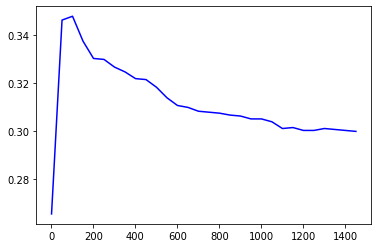

In [ ]:
from matplotlib import pyplot as plt
k=[]
accs=[]
for i in range(1,1500,50):
  newAcc=solveKNN(trainX, devX, trainY, devY, i)
  k.append(i)
  accs.append(newAcc)
plt.plot(k,accs,'b')
accMax = max(accs)
kpos = accs.index(accMax)
kMax = k[kpos]
print("max accuraccy is ", accMax)
print("where k is ", kMax)

############################################
for k =  1
accuraccy is :
0.2656
              precision    recall  f1-score   support

           1       0.43      0.36      0.39       506
           2       0.13      0.10      0.12       223
           3       0.15      0.14      0.14       222
           4       0.20      0.26      0.23       270
           7       0.23      0.24      0.24       262
           8       0.21      0.25      0.23       282
           9       0.17      0.15      0.16       240
          10       0.36      0.38      0.37       495

    accuracy                           0.27      2500
   macro avg       0.24      0.24      0.23      2500
weighted avg       0.27      0.27      0.27      2500

############################################
for k =  2
accuraccy is :
0.2692
              precision    recall  f1-score   support

           1       0.40      0.56      0.46       506
           2       0.13      0.15      0.14       223
           3       0.14      0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  91
accuraccy is :
0.3472
              precision    recall  f1-score   support

           1       0.33      0.92      0.49       506
           2       0.00      0.00      0.00       223
           3       0.27      0.01      0.03       222
           4       0.22      0.04      0.07       270
           7       0.27      0.03      0.06       262
           8       0.24      0.10      0.14       282
           9       0.00      0.00      0.00       240
          10       0.41      0.71      0.52       495

    accuracy                           0.35      2500
   macro avg       0.22      0.23      0.16      2500
weighted avg       0.25      0.35      0.23      2500

############################################
for k =  92
accuraccy is :
0.348
              precision    recall  f1-score   support

           1       0.33      0.92      0.48       506
           2       0.00      0.00      0.00       223
           3       0.30      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  96
accuraccy is :
0.3456
              precision    recall  f1-score   support

           1       0.33      0.93      0.48       506
           2       0.00      0.00      0.00       223
           3       0.30      0.01      0.03       222
           4       0.25      0.04      0.07       270
           7       0.32      0.04      0.07       262
           8       0.24      0.09      0.13       282
           9       0.00      0.00      0.00       240
          10       0.40      0.70      0.51       495

    accuracy                           0.35      2500
   macro avg       0.23      0.23      0.16      2500
weighted avg       0.26      0.35      0.23      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  97
accuraccy is :
0.3464
              precision    recall  f1-score   support

           1       0.33      0.93      0.48       506
           2       0.00      0.00      0.00       223
           3       0.30      0.01      0.03       222
           4       0.26      0.04      0.07       270
           7       0.26      0.03      0.06       262
           8       0.27      0.09      0.14       282
           9       0.00      0.00      0.00       240
          10       0.40      0.70      0.51       495

    accuracy                           0.35      2500
   macro avg       0.23      0.23      0.16      2500
weighted avg       0.26      0.35      0.23      2500

############################################
for k =  98
accuraccy is :
0.348
              precision    recall  f1-score   support

           1       0.33      0.93      0.48       506
           2       0.00      0.00      0.00       223
           3       0.30      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  102
accuraccy is :
0.348
              precision    recall  f1-score   support

           1       0.32      0.93      0.48       506
           2       0.00      0.00      0.00       223
           3       0.20      0.01      0.02       222
           4       0.26      0.04      0.06       270
           7       0.33      0.04      0.07       262
           8       0.27      0.10      0.15       282
           9       0.00      0.00      0.00       240
          10       0.40      0.70      0.51       495

    accuracy                           0.35      2500
   macro avg       0.22      0.23      0.16      2500
weighted avg       0.26      0.35      0.23      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  103
accuraccy is :
0.3464
              precision    recall  f1-score   support

           1       0.32      0.93      0.48       506
           2       0.00      0.00      0.00       223
           3       0.27      0.01      0.03       222
           4       0.24      0.03      0.06       270
           7       0.34      0.04      0.07       262
           8       0.25      0.09      0.13       282
           9       0.00      0.00      0.00       240
          10       0.40      0.70      0.51       495

    accuracy                           0.35      2500
   macro avg       0.23      0.23      0.16      2500
weighted avg       0.26      0.35      0.23      2500

############################################
for k =  104
accuraccy is :
0.3488
              precision    recall  f1-score   support

           1       0.33      0.94      0.48       506
           2       0.00      0.00      0.00       223
           3       0.27   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  108
accuraccy is :
0.3456
              precision    recall  f1-score   support

           1       0.32      0.94      0.48       506
           2       0.00      0.00      0.00       223
           3       0.22      0.01      0.02       222
           4       0.23      0.03      0.05       270
           7       0.33      0.04      0.07       262
           8       0.25      0.09      0.13       282
           9       0.25      0.00      0.01       240
          10       0.41      0.69      0.51       495

    accuracy                           0.35      2500
   macro avg       0.25      0.22      0.16      2500
weighted avg       0.28      0.35      0.23      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  109
accuraccy is :
0.346
              precision    recall  f1-score   support

           1       0.32      0.94      0.48       506
           2       0.00      0.00      0.00       223
           3       0.40      0.02      0.03       222
           4       0.22      0.03      0.05       270
           7       0.35      0.04      0.08       262
           8       0.25      0.09      0.13       282
           9       0.25      0.00      0.01       240
          10       0.41      0.69      0.51       495

    accuracy                           0.35      2500
   macro avg       0.28      0.23      0.16      2500
weighted avg       0.29      0.35      0.23      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  110
accuraccy is :
0.3476
              precision    recall  f1-score   support

           1       0.32      0.94      0.48       506
           2       0.00      0.00      0.00       223
           3       0.44      0.02      0.03       222
           4       0.27      0.03      0.06       270
           7       0.38      0.04      0.08       262
           8       0.25      0.09      0.13       282
           9       0.00      0.00      0.00       240
          10       0.41      0.69      0.51       495

    accuracy                           0.35      2500
   macro avg       0.26      0.23      0.16      2500
weighted avg       0.28      0.35      0.23      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  111
accuraccy is :
0.3448
              precision    recall  f1-score   support

           1       0.32      0.94      0.48       506
           2       0.00      0.00      0.00       223
           3       0.44      0.02      0.03       222
           4       0.24      0.03      0.05       270
           7       0.36      0.04      0.07       262
           8       0.23      0.08      0.12       282
           9       0.00      0.00      0.00       240
          10       0.40      0.69      0.51       495

    accuracy                           0.34      2500
   macro avg       0.25      0.22      0.16      2500
weighted avg       0.27      0.34      0.23      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  112
accuraccy is :
0.3444
              precision    recall  f1-score   support

           1       0.32      0.94      0.48       506
           2       0.00      0.00      0.00       223
           3       0.38      0.01      0.03       222
           4       0.25      0.03      0.06       270
           7       0.36      0.04      0.07       262
           8       0.23      0.08      0.12       282
           9       0.00      0.00      0.00       240
          10       0.41      0.69      0.51       495

    accuracy                           0.34      2500
   macro avg       0.24      0.22      0.16      2500
weighted avg       0.27      0.34      0.23      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  113
accuraccy is :
0.3448
              precision    recall  f1-score   support

           1       0.32      0.94      0.48       506
           2       0.00      0.00      0.00       223
           3       0.38      0.01      0.03       222
           4       0.23      0.03      0.05       270
           7       0.36      0.04      0.07       262
           8       0.25      0.08      0.12       282
           9       0.25      0.00      0.01       240
          10       0.41      0.69      0.51       495

    accuracy                           0.34      2500
   macro avg       0.27      0.22      0.16      2500
weighted avg       0.29      0.34      0.23      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  114
accuraccy is :
0.3464
              precision    recall  f1-score   support

           1       0.32      0.94      0.48       506
           2       1.00      0.00      0.01       223
           3       0.38      0.01      0.03       222
           4       0.23      0.03      0.05       270
           7       0.37      0.04      0.07       262
           8       0.24      0.09      0.13       282
           9       0.33      0.00      0.01       240
          10       0.41      0.69      0.51       495

    accuracy                           0.35      2500
   macro avg       0.41      0.23      0.16      2500
weighted avg       0.39      0.35      0.23      2500

############################################
for k =  115
accuraccy is :
0.3472
              precision    recall  f1-score   support

           1       0.32      0.94      0.48       506
           2       1.00      0.00      0.01       223
           3       0.43   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  123
accuraccy is :
0.3448
              precision    recall  f1-score   support

           1       0.32      0.94      0.47       506
           2       0.00      0.00      0.00       223
           3       0.50      0.02      0.03       222
           4       0.25      0.03      0.06       270
           7       0.32      0.03      0.06       262
           8       0.27      0.09      0.13       282
           9       0.33      0.00      0.01       240
          10       0.40      0.68      0.51       495

    accuracy                           0.34      2500
   macro avg       0.30      0.23      0.16      2500
weighted avg       0.31      0.34      0.23      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  124
accuraccy is :
0.3428
              precision    recall  f1-score   support

           1       0.32      0.94      0.47       506
           2       0.00      0.00      0.00       223
           3       0.50      0.02      0.03       222
           4       0.23      0.03      0.05       270
           7       0.26      0.02      0.04       262
           8       0.27      0.09      0.13       282
           9       0.33      0.00      0.01       240
          10       0.40      0.68      0.51       495

    accuracy                           0.34      2500
   macro avg       0.29      0.22      0.16      2500
weighted avg       0.30      0.34      0.22      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  125
accuraccy is :
0.342
              precision    recall  f1-score   support

           1       0.31      0.94      0.47       506
           2       0.00      0.00      0.00       223
           3       0.50      0.02      0.03       222
           4       0.25      0.03      0.05       270
           7       0.26      0.02      0.04       262
           8       0.26      0.08      0.12       282
           9       0.50      0.00      0.01       240
          10       0.40      0.68      0.51       495

    accuracy                           0.34      2500
   macro avg       0.31      0.22      0.16      2500
weighted avg       0.32      0.34      0.22      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  126
accuraccy is :
0.344
              precision    recall  f1-score   support

           1       0.32      0.94      0.47       506
           2       0.00      0.00      0.00       223
           3       0.57      0.02      0.03       222
           4       0.24      0.03      0.05       270
           7       0.29      0.03      0.05       262
           8       0.27      0.09      0.13       282
           9       0.50      0.00      0.01       240
          10       0.41      0.68      0.51       495

    accuracy                           0.34      2500
   macro avg       0.33      0.22      0.16      2500
weighted avg       0.33      0.34      0.23      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  127
accuraccy is :
0.3432
              precision    recall  f1-score   support

           1       0.32      0.94      0.47       506
           2       0.00      0.00      0.00       223
           3       0.57      0.02      0.03       222
           4       0.23      0.03      0.05       270
           7       0.29      0.03      0.05       262
           8       0.26      0.08      0.12       282
           9       0.50      0.00      0.01       240
          10       0.41      0.68      0.51       495

    accuracy                           0.34      2500
   macro avg       0.32      0.22      0.16      2500
weighted avg       0.33      0.34      0.22      2500

############################################
for k =  128
accuraccy is :
0.3404
              precision    recall  f1-score   support

           1       0.31      0.94      0.47       506
           2       0.00      0.00      0.00       223
           3       0.57   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  131
accuraccy is :
0.3408
              precision    recall  f1-score   support

           1       0.31      0.94      0.47       506
           2       0.00      0.00      0.00       223
           3       0.57      0.02      0.03       222
           4       0.24      0.03      0.05       270
           7       0.27      0.02      0.04       262
           8       0.25      0.08      0.12       282
           9       0.00      0.00      0.00       240
          10       0.40      0.67      0.50       495

    accuracy                           0.34      2500
   macro avg       0.26      0.22      0.15      2500
weighted avg       0.28      0.34      0.22      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  132
accuraccy is :
0.3408
              precision    recall  f1-score   support

           1       0.31      0.94      0.47       506
           2       0.00      0.00      0.00       223
           3       0.57      0.02      0.03       222
           4       0.24      0.02      0.04       270
           7       0.24      0.02      0.04       262
           8       0.26      0.08      0.12       282
           9       0.00      0.00      0.00       240
          10       0.40      0.68      0.50       495

    accuracy                           0.34      2500
   macro avg       0.25      0.22      0.15      2500
weighted avg       0.27      0.34      0.22      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  133
accuraccy is :
0.3408
              precision    recall  f1-score   support

           1       0.32      0.95      0.47       506
           2       0.00      0.00      0.00       223
           3       0.57      0.02      0.03       222
           4       0.19      0.02      0.03       270
           7       0.25      0.02      0.04       262
           8       0.26      0.08      0.12       282
           9       0.00      0.00      0.00       240
          10       0.40      0.68      0.50       495

    accuracy                           0.34      2500
   macro avg       0.25      0.22      0.15      2500
weighted avg       0.27      0.34      0.22      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  134
accuraccy is :
0.3408
              precision    recall  f1-score   support

           1       0.31      0.95      0.47       506
           2       0.00      0.00      0.00       223
           3       0.57      0.02      0.03       222
           4       0.20      0.02      0.03       270
           7       0.22      0.02      0.03       262
           8       0.27      0.09      0.13       282
           9       0.00      0.00      0.00       240
          10       0.40      0.68      0.50       495

    accuracy                           0.34      2500
   macro avg       0.25      0.22      0.15      2500
weighted avg       0.27      0.34      0.22      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  135
accuraccy is :
0.3404
              precision    recall  f1-score   support

           1       0.31      0.94      0.47       506
           2       0.00      0.00      0.00       223
           3       0.50      0.02      0.03       222
           4       0.20      0.02      0.03       270
           7       0.24      0.02      0.04       262
           8       0.27      0.09      0.13       282
           9       0.00      0.00      0.00       240
          10       0.40      0.68      0.50       495

    accuracy                           0.34      2500
   macro avg       0.24      0.22      0.15      2500
weighted avg       0.26      0.34      0.22      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  136
accuraccy is :
0.34
              precision    recall  f1-score   support

           1       0.31      0.94      0.47       506
           2       0.00      0.00      0.00       223
           3       0.38      0.01      0.03       222
           4       0.22      0.02      0.03       270
           7       0.30      0.02      0.04       262
           8       0.26      0.08      0.12       282
           9       0.00      0.00      0.00       240
          10       0.40      0.68      0.50       495

    accuracy                           0.34      2500
   macro avg       0.23      0.22      0.15      2500
weighted avg       0.26      0.34      0.22      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  137
accuraccy is :
0.3392
              precision    recall  f1-score   support

           1       0.31      0.94      0.47       506
           2       0.00      0.00      0.00       223
           3       0.44      0.02      0.03       222
           4       0.17      0.01      0.03       270
           7       0.29      0.02      0.04       262
           8       0.26      0.07      0.12       282
           9       0.00      0.00      0.00       240
          10       0.40      0.68      0.50       495

    accuracy                           0.34      2500
   macro avg       0.23      0.22      0.15      2500
weighted avg       0.26      0.34      0.22      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  138
accuraccy is :
0.3384
              precision    recall  f1-score   support

           1       0.31      0.94      0.47       506
           2       0.00      0.00      0.00       223
           3       0.44      0.02      0.03       222
           4       0.17      0.01      0.03       270
           7       0.27      0.02      0.04       262
           8       0.27      0.08      0.12       282
           9       0.00      0.00      0.00       240
          10       0.40      0.67      0.50       495

    accuracy                           0.34      2500
   macro avg       0.23      0.22      0.15      2500
weighted avg       0.26      0.34      0.22      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  139
accuraccy is :
0.338
              precision    recall  f1-score   support

           1       0.31      0.94      0.47       506
           2       0.00      0.00      0.00       223
           3       0.50      0.02      0.03       222
           4       0.24      0.02      0.04       270
           7       0.19      0.02      0.03       262
           8       0.26      0.07      0.12       282
           9       0.00      0.00      0.00       240
          10       0.40      0.67      0.50       495

    accuracy                           0.34      2500
   macro avg       0.24      0.22      0.15      2500
weighted avg       0.26      0.34      0.22      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  140
accuraccy is :
0.338
              precision    recall  f1-score   support

           1       0.31      0.94      0.47       506
           2       0.00      0.00      0.00       223
           3       0.50      0.02      0.03       222
           4       0.26      0.02      0.04       270
           7       0.24      0.02      0.04       262
           8       0.23      0.07      0.10       282
           9       0.00      0.00      0.00       240
          10       0.40      0.67      0.50       495

    accuracy                           0.34      2500
   macro avg       0.24      0.22      0.15      2500
weighted avg       0.27      0.34      0.22      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  141
accuraccy is :
0.3376
              precision    recall  f1-score   support

           1       0.31      0.94      0.47       506
           2       0.00      0.00      0.00       223
           3       0.50      0.02      0.03       222
           4       0.27      0.02      0.04       270
           7       0.24      0.02      0.04       262
           8       0.25      0.07      0.11       282
           9       0.00      0.00      0.00       240
          10       0.40      0.67      0.50       495

    accuracy                           0.34      2500
   macro avg       0.25      0.22      0.15      2500
weighted avg       0.27      0.34      0.22      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  142
accuraccy is :
0.338
              precision    recall  f1-score   support

           1       0.31      0.94      0.47       506
           2       0.00      0.00      0.00       223
           3       0.50      0.02      0.03       222
           4       0.30      0.03      0.05       270
           7       0.24      0.02      0.03       262
           8       0.26      0.08      0.12       282
           9       0.00      0.00      0.00       240
          10       0.40      0.66      0.50       495

    accuracy                           0.34      2500
   macro avg       0.25      0.22      0.15      2500
weighted avg       0.27      0.34      0.22      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  143
accuraccy is :
0.3372
              precision    recall  f1-score   support

           1       0.31      0.94      0.47       506
           2       0.00      0.00      0.00       223
           3       0.50      0.02      0.03       222
           4       0.27      0.03      0.05       270
           7       0.22      0.02      0.03       262
           8       0.25      0.07      0.11       282
           9       0.00      0.00      0.00       240
          10       0.40      0.66      0.50       495

    accuracy                           0.34      2500
   macro avg       0.24      0.22      0.15      2500
weighted avg       0.27      0.34      0.22      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  144
accuraccy is :
0.3368
              precision    recall  f1-score   support

           1       0.31      0.94      0.47       506
           2       0.00      0.00      0.00       223
           3       0.57      0.02      0.03       222
           4       0.29      0.03      0.05       270
           7       0.24      0.02      0.03       262
           8       0.26      0.07      0.12       282
           9       0.00      0.00      0.00       240
          10       0.39      0.66      0.49       495

    accuracy                           0.34      2500
   macro avg       0.26      0.22      0.15      2500
weighted avg       0.28      0.34      0.22      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  145
accuraccy is :
0.3372
              precision    recall  f1-score   support

           1       0.31      0.94      0.47       506
           2       0.00      0.00      0.00       223
           3       0.57      0.02      0.03       222
           4       0.27      0.03      0.05       270
           7       0.28      0.02      0.04       262
           8       0.25      0.07      0.11       282
           9       0.00      0.00      0.00       240
          10       0.40      0.66      0.50       495

    accuracy                           0.34      2500
   macro avg       0.26      0.22      0.15      2500
weighted avg       0.28      0.34      0.22      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  146
accuraccy is :
0.3368
              precision    recall  f1-score   support

           1       0.31      0.95      0.47       506
           2       0.00      0.00      0.00       223
           3       0.67      0.02      0.04       222
           4       0.24      0.02      0.04       270
           7       0.21      0.02      0.03       262
           8       0.24      0.07      0.11       282
           9       0.00      0.00      0.00       240
          10       0.40      0.66      0.50       495

    accuracy                           0.34      2500
   macro avg       0.26      0.22      0.15      2500
weighted avg       0.28      0.34      0.22      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  147
accuraccy is :
0.3376
              precision    recall  f1-score   support

           1       0.31      0.94      0.47       506
           2       0.00      0.00      0.00       223
           3       0.67      0.02      0.04       222
           4       0.22      0.02      0.04       270
           7       0.24      0.02      0.03       262
           8       0.29      0.09      0.13       282
           9       0.00      0.00      0.00       240
          10       0.40      0.66      0.50       495

    accuracy                           0.34      2500
   macro avg       0.26      0.22      0.15      2500
weighted avg       0.28      0.34      0.22      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  148
accuraccy is :
0.338
              precision    recall  f1-score   support

           1       0.31      0.94      0.47       506
           2       0.00      0.00      0.00       223
           3       0.80      0.02      0.04       222
           4       0.30      0.03      0.05       270
           7       0.24      0.02      0.03       262
           8       0.29      0.09      0.13       282
           9       0.00      0.00      0.00       240
          10       0.39      0.66      0.49       495

    accuracy                           0.34      2500
   macro avg       0.29      0.22      0.15      2500
weighted avg       0.30      0.34      0.22      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############################################
for k =  149
accuraccy is :
0.338
              precision    recall  f1-score   support

           1       0.31      0.94      0.47       506
           2       0.00      0.00      0.00       223
           3       0.75      0.01      0.03       222
           4       0.35      0.03      0.06       270
           7       0.19      0.01      0.02       262
           8       0.30      0.09      0.13       282
           9       0.00      0.00      0.00       240
          10       0.40      0.66      0.50       495

    accuracy                           0.34      2500
   macro avg       0.29      0.22      0.15      2500
weighted avg       0.30      0.34      0.22      2500

max accuraccy is  0.3544
where k is  41


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


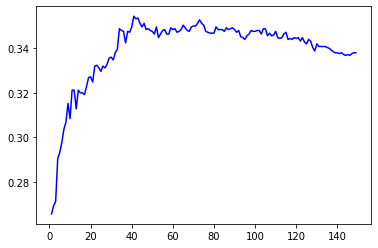

In [ ]:
from matplotlib import pyplot as plt
k=[]
accs=[]
for i in range(1,150,1):
  newAcc=solveKNN(trainX, devX, trainY, devY, i)
  k.append(i)
  accs.append(newAcc)
plt.plot(k,accs,'b')
accMax = max(accs)
kpos = accs.index(accMax)
kMax = k[kpos]
print("max accuraccy is ", accMax)
print("where k is ", kMax)


In [ ]:
solveKNN(x_train, Xtest, y_train, Ytest,41)

############################################
for k =  41
accuraccy is :
0.22224
              precision    recall  f1-score   support

           1       0.21      0.94      0.35      5022
           2       0.07      0.00      0.01      2302
           3       0.05      0.00      0.00      2541
           4       0.14      0.00      0.01      2635
           7       0.14      0.01      0.01      2307
           8       0.19      0.01      0.01      2850
           9       0.13      0.00      0.00      2344
          10       0.31      0.15      0.21      4999

    accuracy                           0.22     25000
   macro avg       0.16      0.14      0.07     25000
weighted avg       0.18      0.22      0.12     25000



0.22224